In [1]:
from sklearn.neural_network import MLPRegressor
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# Let's start by naming the features
names = ['V', 'ScanRate', 'OR', 'A']

In [3]:
# Reading the dataset through a Pandas function
# Let's start by naming the features
names = ['V', 'ScanRate', 'OR', 'A']
df = pd.read_csv('CVSG0cur.csv', names=names)  
df

,V,ScanRate,OR,A
0,-0.19941,10,0,-0.95189
1,-0.20186,10,0,-0.97491
2,-0.19942,10,0,-0.87831
3,-0.19698,10,0,-0.81864
4,-0.19453,10,0,-0.76636
...,...,...,...,...
2959,-0.18719,100,0,-6.47000
2960,-0.18963,100,0,-6.52000
2961,-0.19207,100,0,-6.54000
2962,-0.19451,100,0,-6.60000


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df)
df1 = pd.DataFrame(data, columns = ['V','ScanRate','OR','A'])

In [5]:
print(scaler.data_max_)

[  0.40119 100.        1.       12.23   ]


In [6]:
data
df1

,V,ScanRate,OR,A
0,0.004063,0.0,0.0,0.301066
1,0.000000,0.0,0.0,0.299846
2,0.004046,0.0,0.0,0.304968
3,0.008092,0.0,0.0,0.308131
4,0.012155,0.0,0.0,0.310903
...,...,...,...,...
2959,0.024326,1.0,0.0,0.008484
2960,0.020280,1.0,0.0,0.005832
2961,0.016234,1.0,0.0,0.004772
2962,0.012188,1.0,0.0,0.001591


In [7]:
# Takes first 4 columns and assign them to variable "X"
X = df1.iloc[:, 0:3]
# Takes first 5th columns and assign them to variable "Y". Object dtype refers to strings.
y = df1.iloc[:, 3:4] 

In [8]:
X.head()

,V,ScanRate,OR
0,0.004063,0.0,0.0
1,0.000000,0.0,0.0
2,0.004046,0.0,0.0
3,0.008092,0.0,0.0
4,0.012155,0.0,0.0


In [9]:
y.head()

,A
0,0.301066
1,0.299846
2,0.304968
3,0.308131
4,0.310903


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [64]:
mlpregressor = MLPRegressor(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (150,50,100), learning_rate= 'constant', solver= 'adam', random_state=42, max_iter=400)
mlpregressor.fit(X_train, y_train.values.ravel())
mlpregressor

MLPRegressor(alpha=0.05, hidden_layer_sizes=(150, 50, 100), max_iter=400,
             random_state=42)

In [65]:
predictions=mlpregressor.predict(X_test)
predictions

array([0.48335235, 0.30027316, 0.28162842, 0.32754633, 0.36490448,
       0.40801277, 0.62056351, 0.29463947, 0.3713351 , 0.33948665,
       0.54386586, 0.52075824, 0.35939682, 0.36949672, 0.26847716,
       0.32165298, 0.25538051, 0.37072231, 0.33681203, 0.36041282,
       0.22555999, 0.33948665, 0.15368213, 0.32036835, 0.37401316,
       0.34778042, 0.54851723, 0.32142876, 0.42294472, 0.49786246,
       0.28707432, 0.35165143, 0.39418249, 0.6215415 , 0.59654808,
       0.34360508, 0.5696896 , 0.39236508, 0.43619843, 0.41203054,
       0.61282946, 0.32644049, 0.39208309, 0.40156758, 0.29162864,
       0.34459653, 0.53462673, 0.72020127, 0.2062788 , 0.47772446,
       0.2498605 , 0.48849735, 0.45249478, 0.24331647, 0.36992664,
       0.42632018, 0.330153  , 0.43441276, 0.40418986, 0.3511267 ,
       0.30015145, 0.35760682, 0.74002437, 0.3441008 , 0.34962191,
       0.7594878 , 0.63656475, 0.48861556, 0.37343236, 0.35727641,
       0.34098278, 0.29263774, 0.39542554, 0.37624121, 0.28972

In [66]:
predictions.shape

(890,)

In [67]:
X_test.shape

(890, 3)

In [68]:
df1 = pd.DataFrame(predictions)
df2 = pd.DataFrame(X_test)

In [69]:
df2.head()

,V,ScanRate,OR
1765,0.858287,0.333333,1.0
525,0.121466,0.111111,0.0
1456,0.109328,0.222222,0.0
929,0.242915,0.111111,0.0
854,0.546555,0.111111,1.0


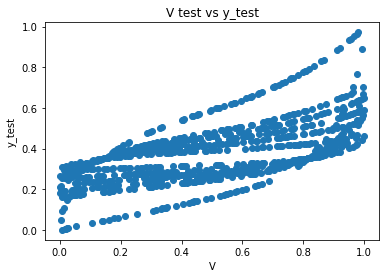

In [70]:
plt.scatter(df2['V'],y_test)
plt.xlabel('V')
plt.ylabel('y_test')
plt.title('V test vs y_test')
plt.show()

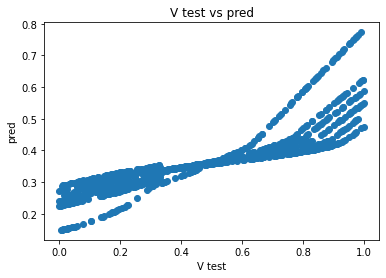

In [71]:
plt.scatter(df2['V'],predictions)
plt.xlabel('V test')
plt.ylabel('pred')
plt.title('V test vs pred')
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predictions)
# report error
print(MSE)

0.010454813597067016


In [73]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

0.5131582621489573


In [74]:
# calculate errors
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predictions)
# report error
print(MAE)

0.0859180898996887


In [75]:
score=mlpregressor.score(X_test,y_test)
score

0.5131582621489573

In [76]:
rmse = np.sqrt(MSE)
rmse

0.10224878286349924

In [78]:
history = mlpregressor.fit(X_train, y_train, epoch=34, batch_size=1, validation_data=(X_val, y_val))
loss_train = history.history['train_loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

TypeError: fit() got an unexpected keyword argument 'epoch'

Text(0, 0.5, 'rmse')

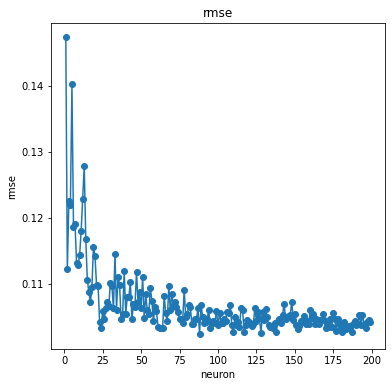

In [18]:
rmse = []
list_k = list(range(1,200))
for i in list_k:
    mlpregressor = MLPRegressor(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (i), learning_rate= 'constant', solver= 'adam', random_state=0, max_iter=400)
    mlpregressor.fit(X_train, y_train.values.ravel())
    predictions=mlpregressor.predict(X_test)
    rmsec = np.sqrt(mean_squared_error(y_test,predictions))
    rmse.append(rmsec);
plt.figure(figsize=(6,6))
plt.plot(list_k, rmse, '-o')
plt.title('rmse')
plt.xlabel('neuron')
plt.ylabel('rmse')

Text(0, 0.5, 'MSE')

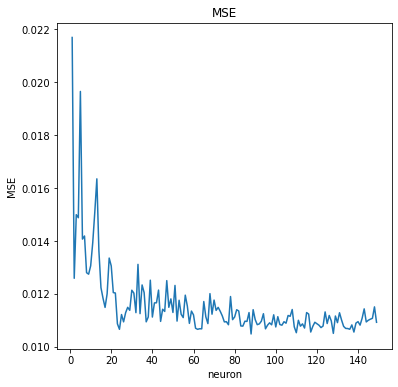

In [17]:
mse = []
list_k = list(range(1,150))
for i in list_k:
    mlpregressor = MLPRegressor(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (i), learning_rate= 'constant', solver= 'adam', random_state=0, max_iter=400)
    mlpregressor.fit(X_train, y_train.values.ravel())
    predictions=mlpregressor.predict(X_test)
    mse1 = mean_squared_error(y_test,predictions)
    mse.append(mse1);
    
plt.figure(figsize=(6,6))
plt.plot(list_k, mse)
plt.title('MSE')
plt.xlabel('neuron')
plt.ylabel('MSE')

Text(0, 0.5, 'r2')

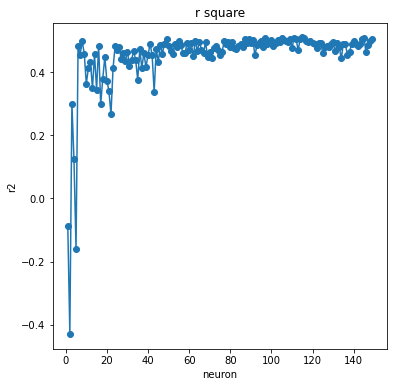

In [14]:
r2 = []
list_k = list(range(1,150))
for i in list_k:
    mlpregressor = MLPRegressor(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (i), learning_rate= 'constant', solver= 'adam', random_state=42, max_iter=400)
    mlpregressor.fit(X_train, y_train.values.ravel())
    predictions=mlpregressor.predict(X_test)
    rsq = r2_score(y_test, predictions)
    r2.append(rsq);
    
plt.figure(figsize=(6,6))
plt.plot(list_k, r2, '-o')
plt.title('r square')
plt.xlabel('neuron')
plt.ylabel('r2')

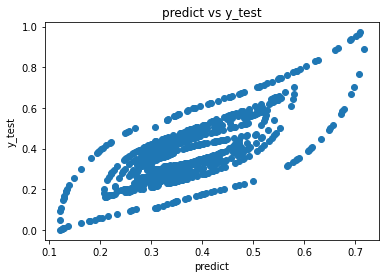

In [17]:
plt.scatter(predictions,y_test)
plt.xlabel('predict')
plt.ylabel('y_test')
plt.title('predict vs y_test')
plt.show()

Text(0.5, 1.0, 'Plot V vs A')

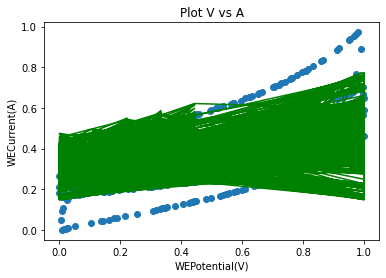

In [79]:
y_pred = mlpregressor.predict(X_test)
plt.scatter(df2['V'],y_test)
plt.plot(X_test, y_pred, c='g')
plt.xlabel('WEPotential(V)')
plt.ylabel('WECurrent(A)')
plt.title('Plot V vs A')

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
crossval = cross_val_score(mlpregressor, X_test, y_test.values.ravel(), cv=5)
crossval
check_parameters = { 'hidden_layer_sizes': [(50,50), (100,50)], 'activation': ['sigmoid', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive'], }


check_parameters = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [52]:
gridsearchcv = GridSearchCV(mlpregressor, check_parameters, n_jobs=-1, cv=5)
gridsearchcv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=MLPRegressor(alpha=0.05, hidden_layer_sizes=(150, 100),
                                    learning_rate='adaptive', max_iter=400,
                                    random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['sigmoid', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [53]:
print('Best parameters found:\n', gridsearchcv.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
